In [1]:
import sys, os
sys.path.append('..'); os.chdir('..')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [42]:
df = pd.read_csv("data/emodataset/evaluations.csv", index_col="params")
metrics = ['ccc_v','ccc_a','ccc_mean','rmse_v','rmse_a','mae_v','mae_a','expr_acc']
df = df[metrics].T
df.index
df = df.drop(['mae_a', 'mae_v', 'ccc_mean'], axis=0)
df

params,emonet_8_untrained.pth,emonet_8.pth,emonet_8_FT_15ep_best.pth
ccc_v,0.0004,0.524,0.6694
ccc_a,0.0017,0.162,0.1768
rmse_v,0.6820,0.539,0.5279
rmse_a,0.4930,0.415,0.3837
expr_acc,0.0599,0.584,0.5839


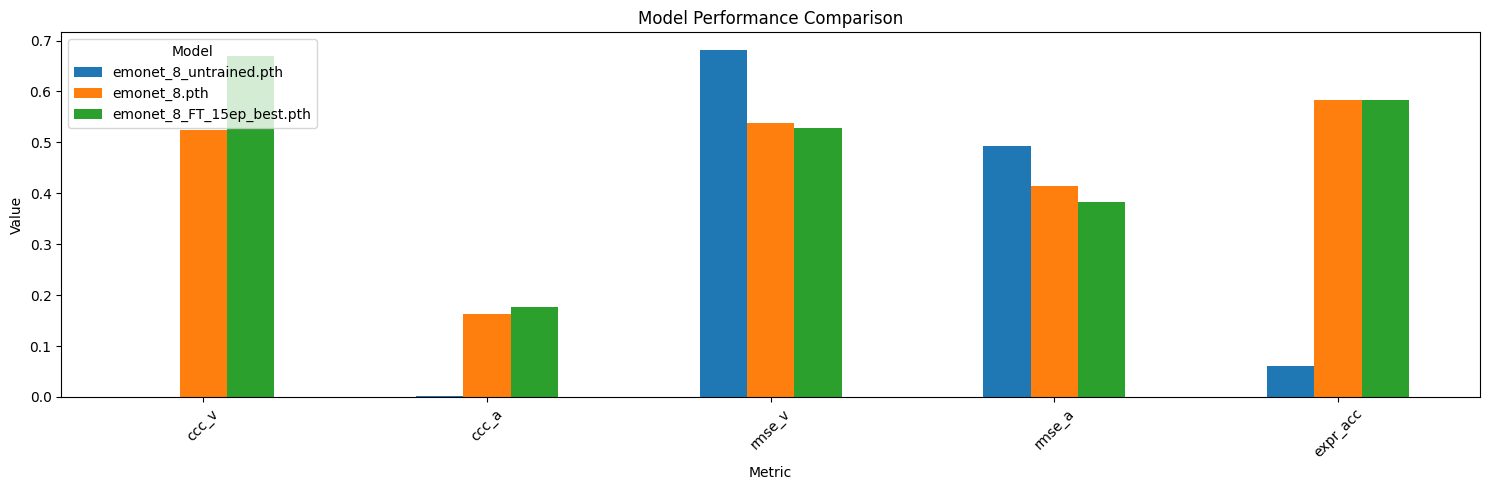

In [41]:
# plot dataframe

df.plot(kind='bar', figsize=(15, 5))
plt.title('Model Performance Comparison')
plt.ylabel('Value')
plt.xlabel('Metric')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.tight_layout()
plt.show()